## Analytical Playground 


### Run Those cells one-by-one

In [47]:
import sys
import os

# Get the path to the virtual environment
venv_path = os.path.join(os.getcwd(), 'venv')

# Add the virtual environment's site-packages to the Python path
site_packages = os.path.join(venv_path, 'lib', f'python{sys.version_info.major}.{sys.version_info.minor}', 'site-packages')
sys.path.append(site_packages)

# Set the Python executable to use the virtual environment
os.environ['VIRTUAL_ENV'] = venv_path
os.environ['PATH'] = f"{os.path.join(venv_path, 'bin')}:{os.environ['PATH']}"


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from curser_analytics.db.connection import get_mysql_connection, get_postgres_connection, get_snowflake_connection
from curser_analytics.db.connection import DatabaseConnection
load_dotenv()

True

In [49]:
mysql_conn = get_mysql_connection() # replace with postgres_conn or snowflake_conn as needed

if mysql_conn.connect():
    print("Successfully connected to MySQL database")
else:
    print("Failed to connect to MySQL database")

Successfully connected to MySQL database


### Your query here:

In [50]:
query = """
select * from data.markets
"""

In [51]:
# Execute the query and store results in a DataFrame
df = mysql_conn.execute_query(query)
df

,Id,Name,IsActive,ActivePeriod,SettlementPeriod,MarketFamilyId,CoverageLevel,OppositeId,IsPostMatchSettled,IsInPlaySettled,IncidentTypeId,Stage,Description,Period,DynamicBets,PartialOutcomes,IsPostMatchSettled_Int,IsInPlaySettled_Int
0,1,1X2,1,100.0,0.0,1,0,NaN,1,1,0.0,10,Who will win the game,,NaN,NaN,1,1
1,2,Under/Over,1,100.0,0.0,7,0,NaN,1,1,9.0,10,Will the score be under/over a specific line,,NaN,NaN,1,1
2,3,Asian Handicap,1,100.0,0.0,8,0,NaN,1,1,9.0,10,Who will win the game with handicap (no draw)\...,,NaN,NaN,1,1
3,4,HT/FT,1,100.0,0.0,13,0,NaN,1,1,9.0,10,Who will win till the end of the HT and who wi...,,NaN,NaN,1,1
4,5,Odd/Even,1,100.0,0.0,10,0,NaN,1,1,11.0,10,Will the score be odd or even,,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1202,Under/Over Player Receptions,1,0.0,0.0,141,0,NaN,0,0,0.0,10,Betting on a specific player to make number of...,,NaN,NaN,0,0
996,1203,Under/Over Player Field Goals Made,1,0.0,0.0,141,0,NaN,0,0,0.0,10,Betting on a specific player to make number of...,,NaN,NaN,0,0
997,1204,Under/Over Player Field Goals Attempted,1,0.0,0.0,141,0,NaN,0,0,0.0,10,Betting on a specific player to make number of...,,NaN,NaN,0,0
998,1205,Under/Over Player Quarterback Passing Touchdowns,1,0.0,0.0,141,0,NaN,0,0,0.0,10,Betting on a specific player (Quarterback) to ...,,NaN,NaN,0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1000 non-null   int64  
 1   Name                    1000 non-null   object 
 2   IsActive                1000 non-null   int64  
 3   ActivePeriod            995 non-null    float64
 4   SettlementPeriod        728 non-null    float64
 5   MarketFamilyId          1000 non-null   int64  
 6   CoverageLevel           1000 non-null   int64  
 7   OppositeId              260 non-null    float64
 8   IsPostMatchSettled      1000 non-null   int64  
 9   IsInPlaySettled         1000 non-null   int64  
 10  IncidentTypeId          741 non-null    float64
 11  Stage                   1000 non-null   int64  
 12  Description             928 non-null    object 
 13  Period                  1000 non-null   object 
 14  DynamicBets             10 non-null     f

### Your analysis here

<Figure size 2600x1000 with 0 Axes>

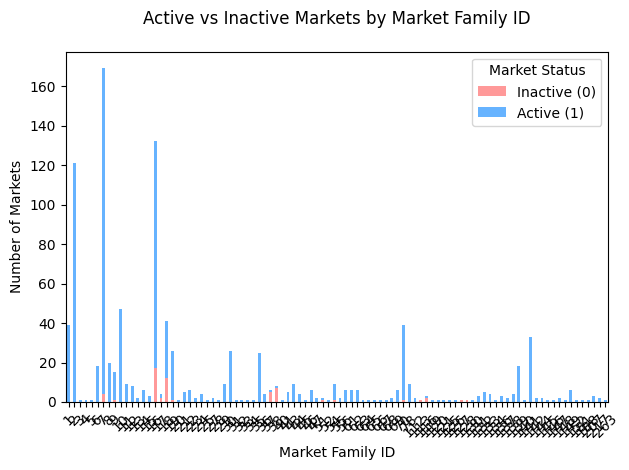

In [58]:
# Create a figure with a larger size
plt.figure(figsize=(26, 10))

# Create a pivot table to get counts of active vs inactive markets by MarketFamilyId
pivot_df = pd.pivot_table(
    df,
    values='Id',
    index='MarketFamilyId',
    columns='IsActive',
    aggfunc='count',
    fill_value=0
)

# Create stacked bar plot
pivot_df.plot(
    kind='bar',
    stacked=True,
    color=['#ff9999', '#66b3ff']
)

# Customize the plot
plt.title('Active vs Inactive Markets by Market Family ID', pad=20)
plt.xlabel('Market Family ID')
plt.ylabel('Number of Markets')
plt.legend(title='Market Status', labels=['Inactive (0)', 'Active (1)'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()
